# **Data Study and Visualisation**

## Objectives

* Answer business requirement 1:
  * The client is interested in understanding the patterns in stock performance, so they can identify the most relevant variables that are correlated with price movements and trends. This will help the client make informed decisions and better predict future stock behavior
* Evaluate and explore raw data
* Extract features for exploratory analysis
* Define the target variable for supervised learning

## Inputs

* outputs/datasets/collection/phnx_2010_2025.csv

## Outputs

* Initial visualizations of key patterns and relationships
* generate code that answers business requirement 1 and can be used to build the Streamlit App

## Additional Comments

* Some feature engineering tasks were performed at this stage to support pattern discovery and visualization, even though full feature analysis will take place later. This helps guide modeling decisions and improves understanding of the dataset's structure


---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os

current_dir = os.getcwd()
current_dir

'c:\\Users\\ajv10\\Documents\\vscode-projects\\PP5\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\ajv10\\Documents\\vscode-projects\\PP5'

---

## Load Data

In [4]:
import pandas as pd

df = pd.read_csv("outputs/datasets/collection/phnx_2010_2025.csv")
print(df.shape)
df.head(3)

(3788, 8)


date        open        high         low       close  \
0  2010-01-04 00:00:00+00:00  477.996320  504.136205  477.996320  497.990021   
1  2010-01-05 00:00:00+00:00  507.246289  510.282389  507.246289  497.990021   
2  2010-01-06 00:00:00+00:00  497.990021  497.990021  497.990021  497.990021   

   volume  dividends  stock splits  
0   13401        0.0           0.0  
1   10729        0.0           0.0  
2       0        0.0           0.0

---

## Data Exploration

In [5]:
from ydata_profiling import ProfileReport

pandas_report = ProfileReport(df=df, minimal=True)
pandas_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

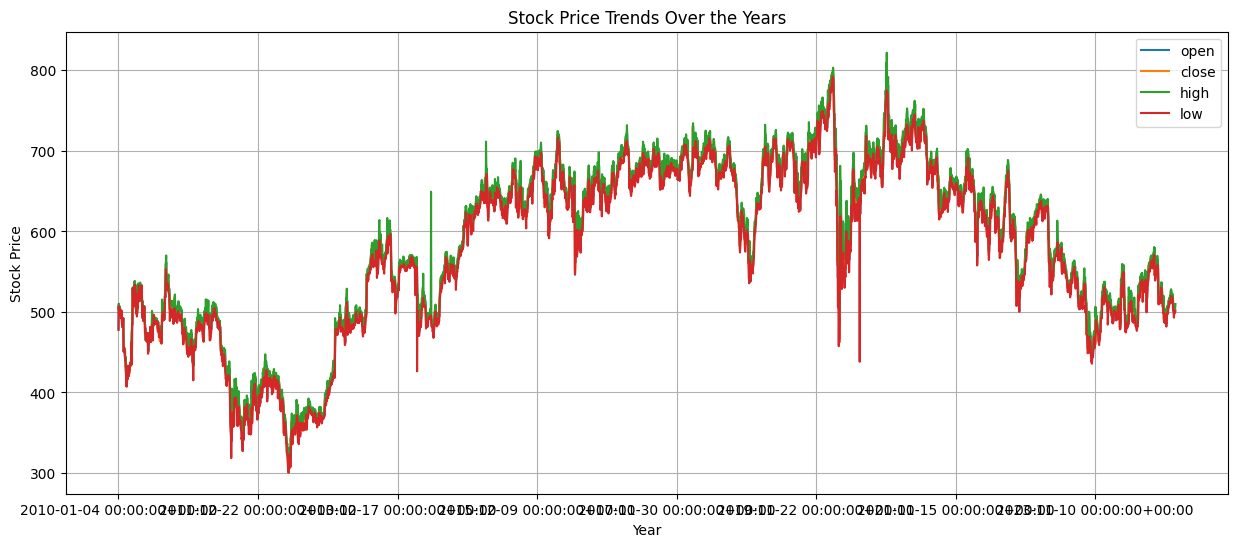

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline


df.plot.line(y=['open', 'close', 'high', 'low'], x='date', figsize=(15, 6))
plt.title('Stock Price Trends Over the Years')
plt.xlabel('Year')
plt.ylabel('Stock Price')
plt.grid(True)
plt.show()

In [7]:
df.describe()

open         high          low        close        volume  \
count  3788.000000  3788.000000  3788.000000  3788.000000  3.788000e+03   
mean    582.103965   588.190855   575.936590   581.861709  1.334619e+06   
std     104.448318   104.634444   104.020798   104.320992  1.656785e+06   
min     302.948969   310.063232   300.355255   300.355255  0.000000e+00   
25%     500.001132   505.022677   494.639013   499.841217  3.255728e+05   
50%     603.590725   611.489093   595.446567   602.829987  9.011365e+05   
75%     670.593645   676.739221   663.880899   670.212250  1.735034e+06   
max     797.586650   821.913029   791.945904   800.317871  3.707343e+07   

         dividends  stock splits  
count  3788.000000        3788.0  
mean      0.098475           0.0  
std       1.486710           0.0  
min       0.000000           0.0  
25%       0.000000           0.0  
50%       0.000000           0.0  
75%       0.000000           0.0  
max      26.650000           0.0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3788 entries, 0 to 3787
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          3788 non-null   object 
 1   open          3788 non-null   float64
 2   high          3788 non-null   float64
 3   low           3788 non-null   float64
 4   close         3788 non-null   float64
 5   volume        3788 non-null   int64  
 6   dividends     3788 non-null   float64
 7   stock splits  3788 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 236.9+ KB


Review the average across all continuous numerical features

In [9]:
mean = df[['open','close','high','low','volume']].mean()
print(f"Open: {mean['open']:.2f}")
print(f"Close: {mean['close']:.2f}")
print(f"High: {mean['high']:.2f}")
print(f"Low: {mean['low']:.2f}")
print(f"Volume: {mean['volume']:.2f}")

Open: 582.10
Close: 581.86
High: 588.19
Low: 575.94
Volume: 1334618.54


Review the mode across all continuous numerical features, identifying a mode for this type of data can be difficult due to the high variability and lack of repetition in the values

In [10]:
mode = df[['open','close','high','low','volume']].mode()
print(mode)

         open       close        high         low  volume
0  558.936646  558.936646  486.693146  496.508969     0.0
1         NaN         NaN  507.246246  503.543762     NaN
2         NaN         NaN         NaN  522.056335     NaN


Review the median across all continuous numerical features

In [11]:
median = df[['open','close','high','low','volume']].median()
print(f"Open: {median['open']:.2f}")
print(f"Close: {median['close']:.2f}")
print(f"High: {median['high']:.2f}")
print(f"Low: {median['low']:.2f}")
print(f"Volume: {median['volume']:.2f}")

Open: 603.59
Close: 602.83
High: 611.49
Low: 595.45
Volume: 901136.50


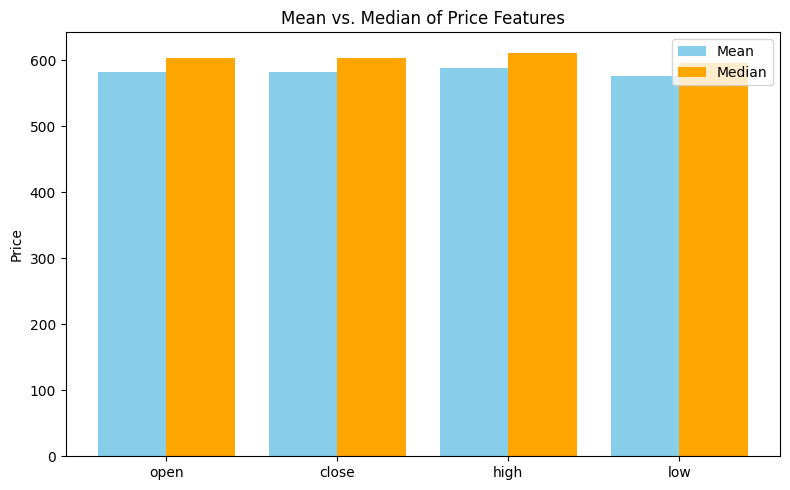

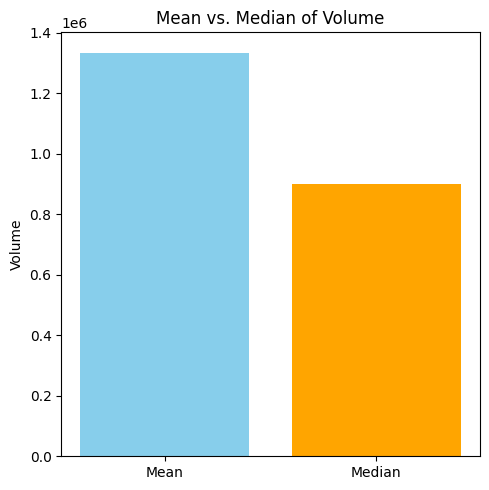

In [12]:
price_cols = ['open', 'close', 'high', 'low']
means_price = [df[col].mean() for col in price_cols]
medians_price = [df[col].median() for col in price_cols]

plt.figure(figsize=(8, 5))
x = range(len(price_cols))
plt.bar(x, means_price, width=0.4, label='Mean', color='skyblue')
plt.bar([i + 0.4 for i in x], medians_price, width=0.4, label='Median', color='orange')
plt.xticks([i + 0.2 for i in x], price_cols)
plt.ylabel('Price')
plt.title('Mean vs. Median of Price Features')
plt.legend()
plt.tight_layout()
plt.show()


volume_mean = df['volume'].mean()
volume_median = df['volume'].median()

plt.figure(figsize=(5, 5))
plt.bar(['Mean', 'Median'], [volume_mean, volume_median], color=['skyblue', 'orange'])
plt.title('Mean vs. Median of Volume')
plt.ylabel('Volume')
plt.tight_layout()
plt.show()


---

## Assessing Missing Data Levels

Drop 'dividends' and 'stock splits' since they hold no meaningfull values

In [13]:
df = df.drop(['dividends','stock splits'],axis=1)

From the YData profiling, we noticed that the volume column contains rows with a value of 0. While this may have been plausible in the early stages (e.g., around 2010), it becomes highly unlikely in later years, such as 2011 and 2017, given the high volume observed in surrounding dates. To address this, we will replace all 0 values in the volume column with NaN, so that they can be dealt with correctly using appropriate imputation techniques

In [14]:
zero_volume_rows = df[df['volume'] == 0]
zero_volume_rows.head(3)

date        open        high         low       close  \
2  2010-01-06 00:00:00+00:00  497.990021  497.990021  497.990021  497.990021   
4  2010-01-08 00:00:00+00:00  503.543762  503.543762  503.543762  503.543762   
5  2010-01-11 00:00:00+00:00  503.543762  503.543762  503.543762  503.543762   

   volume  
2       0  
4       0  
5       0

In [15]:
df.iloc[:10]

date        open        high         low       close  \
0  2010-01-04 00:00:00+00:00  477.996320  504.136205  477.996320  497.990021   
1  2010-01-05 00:00:00+00:00  507.246289  510.282389  507.246289  497.990021   
2  2010-01-06 00:00:00+00:00  497.990021  497.990021  497.990021  497.990021   
3  2010-01-07 00:00:00+00:00  507.468427  507.468427  503.543762  503.543762   
4  2010-01-08 00:00:00+00:00  503.543762  503.543762  503.543762  503.543762   
5  2010-01-11 00:00:00+00:00  503.543762  503.543762  503.543762  503.543762   
6  2010-01-12 00:00:00+00:00  499.841217  499.841217  499.841217  499.841217   
7  2010-01-13 00:00:00+00:00  496.805161  496.805161  496.805161  503.543762   
8  2010-01-14 00:00:00+00:00  501.692535  501.692535  501.692535  501.692535   
9  2010-01-15 00:00:00+00:00  492.436094  492.436094  492.436094  499.841217   

   volume  
0   13401  
1   10729  
2       0  
3    6169  
4       0  
5       0  
6       0  
7    3017  
8       0  
9    1862

In [16]:
df.iloc[333:336]

date        open        high         low  \
333  2011-04-28 00:00:00+01:00  479.107071  497.990043  479.107071   
334  2011-04-29 00:00:00+01:00  495.768555  495.768555  495.768555   
335  2011-05-03 00:00:00+01:00  490.955126  507.986739  490.955126   

          close  volume  
333  495.768555  223564  
334  495.768555       0  
335  499.470978  182371

In [17]:
df.iloc[1898:1901]

date        open        high         low  \
1898  2017-07-10 00:00:00+01:00  695.256776  699.285870  687.198408   
1899  2017-07-11 00:00:00+01:00  690.332214  690.332214  690.332214   
1900  2017-07-12 00:00:00+01:00  681.378408  681.378408  672.424632   

           close   volume  
1898  690.332214   888256  
1899  690.332214        0  
1900  676.901550  1084099

In [18]:
def zero_count(df):
    return (df == 0).sum()

zero_count(df)

date       0
open       0
high       0
low        0
close      0
volume    49
dtype: int64

In [19]:
import numpy as np

df['volume'] = df['volume'].replace(0, np.nan)
df.head(3)

date        open        high         low       close  \
0  2010-01-04 00:00:00+00:00  477.996320  504.136205  477.996320  497.990021   
1  2010-01-05 00:00:00+00:00  507.246289  510.282389  507.246289  497.990021   
2  2010-01-06 00:00:00+00:00  497.990021  497.990021  497.990021  497.990021   

    volume  
0  13401.0  
1  10729.0  
2      NaN

In [20]:
zero_count(df)

date      0
open      0
high      0
low       0
close     0
volume    0
dtype: int64

In [21]:
vars_with_missing_data = df.columns[df.isna().sum() > 0].to_list()
vars_with_missing_data

['volume']

In [22]:
if vars_with_missing_data:
    profile = ProfileReport(df=df[vars_with_missing_data], minimal=True)
    profile.to_notebook_iframe()
else:
    print("There are no variables with missing data")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [23]:
def EvaluateMissingData(df):
    missing_data_absolute = df.isnull().sum()
    missing_data_percentage = round(missing_data_absolute/len(df)*100, 2)
    df_missing_data = (pd.DataFrame(
                            data={"RowsWithMissingData": missing_data_absolute,
                                   "PercentageOfDataset": missing_data_percentage,
                                   "DataType": df.dtypes}
                                    )
                          .sort_values(by=['PercentageOfDataset'], ascending=False)
                          .query("PercentageOfDataset > 0")
                          )

    return df_missing_data

In [24]:
EvaluateMissingData(df)

RowsWithMissingData  PercentageOfDataset DataType
volume                   49                 1.29  float64

---

## Imputation

After assessing the missing data, we noticed that the price range on rows with missing volume values often shows a repetitive pattern consistent with previous closing entries — either indicating no price movement or suggesting that a forward fill method may have been used to impute missing price data. To align with this pattern, we applied Pandas forward fill to impute the missing volume values. This approach helps maintain a more natural and realistic flow in the volume data, ensuring consistency with the existing structure

In [25]:
df['volume'] = df['volume'].ffill()

In [26]:
df.iloc[333:336]

date        open        high         low  \
333  2011-04-28 00:00:00+01:00  479.107071  497.990043  479.107071   
334  2011-04-29 00:00:00+01:00  495.768555  495.768555  495.768555   
335  2011-05-03 00:00:00+01:00  490.955126  507.986739  490.955126   

          close    volume  
333  495.768555  223564.0  
334  495.768555  223564.0  
335  499.470978  182371.0

In [27]:
df.iloc[1898:1901]

date        open        high         low  \
1898  2017-07-10 00:00:00+01:00  695.256776  699.285870  687.198408   
1899  2017-07-11 00:00:00+01:00  690.332214  690.332214  690.332214   
1900  2017-07-12 00:00:00+01:00  681.378408  681.378408  672.424632   

           close     volume  
1898  690.332214   888256.0  
1899  690.332214   888256.0  
1900  676.901550  1084099.0

In [28]:
EvaluateMissingData(df)

Empty DataFrame
Columns: [RowsWithMissingData, PercentageOfDataset, DataType]
Index: []

---

## Feature Extraction

Convert datetime object to a date format

In [29]:
df['date'] = pd.to_datetime(df['date'],utc=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3788 entries, 0 to 3787
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   date    3788 non-null   datetime64[ns, UTC]
 1   open    3788 non-null   float64            
 2   high    3788 non-null   float64            
 3   low     3788 non-null   float64            
 4   close   3788 non-null   float64            
 5   volume  3788 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(5)
memory usage: 177.7 KB


Extract the days of the week and the year from the 'date' column, store them in new columns, and then drop the 'date' column

In [30]:
df.insert(1, 'year', df['date'].dt.year)
df.insert(2, 'weekday', df['date'].dt.day_name())
df = df.drop(['date'],axis=1)
print(df.shape)
df.head(3)

(3788, 7)


year    weekday        open        high         low       close   volume
0  2010     Monday  477.996320  504.136205  477.996320  497.990021  13401.0
1  2010    Tuesday  507.246289  510.282389  507.246289  497.990021  10729.0
2  2010  Wednesday  497.990021  497.990021  497.990021  497.990021  10729.0

One hot encode the 'weekday' column

In [31]:
from feature_engine.encoding import OneHotEncoder
encoder = OneHotEncoder(variables=df.columns[df.dtypes=='object'].to_list(), drop_last=False)
df = encoder.fit_transform(df)
print(df.shape)
df.head(3)

(3788, 12)


year        open        high         low       close   volume  \
0  2010  477.996320  504.136205  477.996320  497.990021  13401.0   
1  2010  507.246289  510.282389  507.246289  497.990021  10729.0   
2  2010  497.990021  497.990021  497.990021  497.990021  10729.0   

   weekday_Monday  weekday_Tuesday  weekday_Wednesday  weekday_Thursday  \
0               1                0                  0                 0   
1               0                1                  0                 0   
2               0                0                  1                 0   

   weekday_Friday  weekday_Sunday  
0               0               0  
1               0               0  
2               0               0

In [32]:
df.columns = df.columns.str.lower()
df.head(3)

year        open        high         low       close   volume  \
0  2010  477.996320  504.136205  477.996320  497.990021  13401.0   
1  2010  507.246289  510.282389  507.246289  497.990021  10729.0   
2  2010  497.990021  497.990021  497.990021  497.990021  10729.0   

   weekday_monday  weekday_tuesday  weekday_wednesday  weekday_thursday  \
0               1                0                  0                 0   
1               0                1                  0                 0   
2               0                0                  1                 0   

   weekday_friday  weekday_sunday  
0               0               0  
1               0               0  
2               0               0

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3788 entries, 0 to 3787
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               3788 non-null   int32  
 1   open               3788 non-null   float64
 2   high               3788 non-null   float64
 3   low                3788 non-null   float64
 4   close              3788 non-null   float64
 5   volume             3788 non-null   float64
 6   weekday_monday     3788 non-null   int32  
 7   weekday_tuesday    3788 non-null   int32  
 8   weekday_wednesday  3788 non-null   int32  
 9   weekday_thursday   3788 non-null   int32  
 10  weekday_friday     3788 non-null   int32  
 11  weekday_sunday     3788 non-null   int32  
dtypes: float64(5), int32(7)
memory usage: 251.7 KB


Create lag features by shifting previous rows to capture historical trends and support time-based pattern analysis

In [34]:
df['pre_open'] = df['open'].shift(+1)
df['pre_open_2'] = df['open'].shift(+2)

df['pre_high'] = df['high'].shift(+1)
df['pre_high_2'] = df['high'].shift(+2)

df['pre_low'] = df['low'].shift(+1)
df['pre_low_2'] = df['low'].shift(+2)

df['pre_close'] = df['close'].shift(+1)
df['pre_close_2'] = df['close'].shift(+2)

df['pre_vol'] = df['volume'].shift(+1)
df['pre_vol_2'] = df['volume'].shift(+2)

df['pre_average'] = df[['open', 'close']].mean(axis=1).shift(+1)
df['pre_average_2'] = df[['open', 'close']].mean(axis=1).shift(+2)

print(df.shape)
df

(3788, 24)


year        open        high         low       close     volume  \
0     2010  477.996320  504.136205  477.996320  497.990021    13401.0   
1     2010  507.246289  510.282389  507.246289  497.990021    10729.0   
2     2010  497.990021  497.990021  497.990021  497.990021    10729.0   
3     2010  507.468427  507.468427  503.543762  503.543762     6169.0   
4     2010  503.543762  503.543762  503.543762  503.543762     6169.0   
...    ...         ...         ...         ...         ...        ...   
3783  2024  498.162306  502.260357  496.762980  501.260834  1071229.0   
3784  2024  502.260351  505.258920  501.760590  501.760590   436491.0   
3785  2024  500.261324  503.759655  500.261324  502.760132   881757.0   
3786  2024  501.760601  504.759170  498.961948  500.761078   608408.0   
3787  2024  502.260352  509.756775  500.523174  509.756775   514204.0   

      weekday_monday  weekday_tuesday  weekday_wednesday  weekday_thursday  \
0                  1                0                  0                 0   
1                  0                1                  0                 0   
2                  0                0                  1                 0   
3                  0                0                  0                 1   
4                  0                0                  0                 0   
...              ...              ...                ...               ...   
3783               1                0                  0                 0   
3784               0                1                  0                 0   
3785               0                0                  0                 0   
3786               1                0                  0                 0   
3787               0                1                  0                 0   

      ...    pre_high  pre_high_2     pre_low   pre_low_2   pre_close  \
0     ...         NaN         NaN         NaN         NaN         NaN   
1     ...  504.136205         NaN  477.996320         NaN  497.990021   
2     ...  510.282389  504.136205  507.246289  477.996320  497.990021   
3     ...  497.990021  510.282389  497.990021  507.246289  497.990021   
4     ...  507.468427  497.990021  503.543762  497.990021  503.543762   
...   ...         ...         ...         ...         ...         ...   
3783  ...  502.260368  501.760601  492.964815  497.162789  500.261322   
3784  ...  502.260357  502.260368  496.762980  492.964815  501.260834   
3785  ...  505.258920  502.260357  501.760590  496.762980  501.760590   
3786  ...  503.759655  505.258920  500.261324  501.760590  502.760132   
3787  ...  504.759170  503.759655  498.961948  500.261324  500.761078   

      pre_close_2    pre_vol  pre_vol_2  pre_average  pre_average_2  
0             NaN        NaN        NaN          NaN            NaN  
1             NaN    13401.0        NaN   487.993170            NaN  
2      497.990021    10729.0    13401.0   502.618155     487.993170  
3      497.990021    10729.0    10729.0   497.990021     502.618155  
4      497.990021     6169.0    10729.0   505.506095     497.990021  
...           ...        ...        ...          ...            ...  
3783   500.761078  3415182.0  1667456.0   500.011441     501.010959  
3784   500.261322  1071229.0  3415182.0   499.711570     500.011441  
3785   501.260834   436491.0  1071229.0   502.010470     499.711570  
3786   501.760590   881757.0   436491.0   501.510728     502.010470  
3787   502.760132   608408.0   881757.0   501.260839     501.510728  

[3788 rows x 24 columns]

---

## Target Variable Definition for Classification and Regression

Create a regression target by calculating tomorrow’s average price (mean of open and close). This target was chosen arbitrarily

In [35]:
df['average'] = df[['open', 'close']].mean(axis=1)

In [36]:
highest = df['average'].max()
lowest = df['average'].min()

print(f"Highest average price: {highest}")
print(f"Lowest average price: {lowest}")

Highest average price: 797.8760422597712
Lowest average price: 302.94898388424826


In [37]:
df['tomorrows_average'] = df[['open', 'close']].mean(axis=1).shift(-1)
print(df.shape)
df

(3788, 26)


year        open        high         low       close     volume  \
0     2010  477.996320  504.136205  477.996320  497.990021    13401.0   
1     2010  507.246289  510.282389  507.246289  497.990021    10729.0   
2     2010  497.990021  497.990021  497.990021  497.990021    10729.0   
3     2010  507.468427  507.468427  503.543762  503.543762     6169.0   
4     2010  503.543762  503.543762  503.543762  503.543762     6169.0   
...    ...         ...         ...         ...         ...        ...   
3783  2024  498.162306  502.260357  496.762980  501.260834  1071229.0   
3784  2024  502.260351  505.258920  501.760590  501.760590   436491.0   
3785  2024  500.261324  503.759655  500.261324  502.760132   881757.0   
3786  2024  501.760601  504.759170  498.961948  500.761078   608408.0   
3787  2024  502.260352  509.756775  500.523174  509.756775   514204.0   

      weekday_monday  weekday_tuesday  weekday_wednesday  weekday_thursday  \
0                  1                0                  0                 0   
1                  0                1                  0                 0   
2                  0                0                  1                 0   
3                  0                0                  0                 1   
4                  0                0                  0                 0   
...              ...              ...                ...               ...   
3783               1                0                  0                 0   
3784               0                1                  0                 0   
3785               0                0                  0                 0   
3786               1                0                  0                 0   
3787               0                1                  0                 0   

      ...     pre_low   pre_low_2   pre_close  pre_close_2    pre_vol  \
0     ...         NaN         NaN         NaN          NaN        NaN   
1     ...  477.996320         NaN  497.990021          NaN    13401.0   
2     ...  507.246289  477.996320  497.990021   497.990021    10729.0   
3     ...  497.990021  507.246289  497.990021   497.990021    10729.0   
4     ...  503.543762  497.990021  503.543762   497.990021     6169.0   
...   ...         ...         ...         ...          ...        ...   
3783  ...  492.964815  497.162789  500.261322   500.761078  3415182.0   
3784  ...  496.762980  492.964815  501.260834   500.261322  1071229.0   
3785  ...  501.760590  496.762980  501.760590   501.260834   436491.0   
3786  ...  500.261324  501.760590  502.760132   501.760590   881757.0   
3787  ...  498.961948  500.261324  500.761078   502.760132   608408.0   

      pre_vol_2  pre_average  pre_average_2     average  tomorrows_average  
0           NaN          NaN            NaN  487.993170         502.618155  
1           NaN   487.993170            NaN  502.618155         497.990021  
2       13401.0   502.618155     487.993170  497.990021         505.506095  
3       10729.0   497.990021     502.618155  505.506095         503.543762  
4       10729.0   505.506095     497.990021  503.543762         503.543762  
...         ...          ...            ...         ...                ...  
3783  1667456.0   500.011441     501.010959  499.711570         502.010470  
3784  3415182.0   499.711570     500.011441  502.010470         501.510728  
3785  1071229.0   502.010470     499.711570  501.510728         501.260839  
3786   436491.0   501.510728     502.010470  501.260839         506.008563  
3787   881757.0   501.260839     501.510728  506.008563                NaN  

[3788 rows x 26 columns]

Classification target: Created by comparing tomorrow’s average price (mean of open and close) to today’s, labeling as 1 if higher and 0 if lower, chosen arbitrarily to explore directional prediction

In [38]:
df['target'] = (df['tomorrows_average'] > df['average']).astype(int)
print(df.shape)
df

(3788, 27)


year        open        high         low       close     volume  \
0     2010  477.996320  504.136205  477.996320  497.990021    13401.0   
1     2010  507.246289  510.282389  507.246289  497.990021    10729.0   
2     2010  497.990021  497.990021  497.990021  497.990021    10729.0   
3     2010  507.468427  507.468427  503.543762  503.543762     6169.0   
4     2010  503.543762  503.543762  503.543762  503.543762     6169.0   
...    ...         ...         ...         ...         ...        ...   
3783  2024  498.162306  502.260357  496.762980  501.260834  1071229.0   
3784  2024  502.260351  505.258920  501.760590  501.760590   436491.0   
3785  2024  500.261324  503.759655  500.261324  502.760132   881757.0   
3786  2024  501.760601  504.759170  498.961948  500.761078   608408.0   
3787  2024  502.260352  509.756775  500.523174  509.756775   514204.0   

      weekday_monday  weekday_tuesday  weekday_wednesday  weekday_thursday  \
0                  1                0                  0                 0   
1                  0                1                  0                 0   
2                  0                0                  1                 0   
3                  0                0                  0                 1   
4                  0                0                  0                 0   
...              ...              ...                ...               ...   
3783               1                0                  0                 0   
3784               0                1                  0                 0   
3785               0                0                  0                 0   
3786               1                0                  0                 0   
3787               0                1                  0                 0   

      ...   pre_low_2   pre_close  pre_close_2    pre_vol  pre_vol_2  \
0     ...         NaN         NaN          NaN        NaN        NaN   
1     ...         NaN  497.990021          NaN    13401.0        NaN   
2     ...  477.996320  497.990021   497.990021    10729.0    13401.0   
3     ...  507.246289  497.990021   497.990021    10729.0    10729.0   
4     ...  497.990021  503.543762   497.990021     6169.0    10729.0   
...   ...         ...         ...          ...        ...        ...   
3783  ...  497.162789  500.261322   500.761078  3415182.0  1667456.0   
3784  ...  492.964815  501.260834   500.261322  1071229.0  3415182.0   
3785  ...  496.762980  501.760590   501.260834   436491.0  1071229.0   
3786  ...  501.760590  502.760132   501.760590   881757.0   436491.0   
3787  ...  500.261324  500.761078   502.760132   608408.0   881757.0   

      pre_average  pre_average_2     average  tomorrows_average  target  
0             NaN            NaN  487.993170         502.618155       1  
1      487.993170            NaN  502.618155         497.990021       0  
2      502.618155     487.993170  497.990021         505.506095       1  
3      497.990021     502.618155  505.506095         503.543762       0  
4      505.506095     497.990021  503.543762         503.543762       0  
...           ...            ...         ...                ...     ...  
3783   500.011441     501.010959  499.711570         502.010470       1  
3784   499.711570     500.011441  502.010470         501.510728       0  
3785   502.010470     499.711570  501.510728         501.260839       0  
3786   501.510728     502.010470  501.260839         506.008563       1  
3787   501.260839     501.510728  506.008563                NaN       0  

[3788 rows x 27 columns]

In [39]:
EvaluateMissingData(df)

RowsWithMissingData  PercentageOfDataset DataType
pre_open_2                           2                 0.05  float64
pre_average_2                        2                 0.05  float64
pre_vol_2                            2                 0.05  float64
pre_close_2                          2                 0.05  float64
pre_low_2                            2                 0.05  float64
pre_high_2                           2                 0.05  float64
pre_high                             1                 0.03  float64
tomorrows_average                    1                 0.03  float64
pre_average                          1                 0.03  float64
pre_vol                              1                 0.03  float64
pre_close                            1                 0.03  float64
pre_low                              1                 0.03  float64
pre_open                             1                 0.03  float64

Since the data has been shifted, it has created some rows with NaN values. An imputation method could be used again to replace the remaining missing data. However, since the amount of missing data is very small, we will simply drop those rows instead

In [40]:
df = df.dropna()
print(df.shape)
df

(3785, 27)


year        open        high         low       close     volume  \
2     2010  497.990021  497.990021  497.990021  497.990021    10729.0   
3     2010  507.468427  507.468427  503.543762  503.543762     6169.0   
4     2010  503.543762  503.543762  503.543762  503.543762     6169.0   
5     2010  503.543762  503.543762  503.543762  503.543762     6169.0   
6     2010  499.841217  499.841217  499.841217  499.841217     6169.0   
...    ...         ...         ...         ...         ...        ...   
3782  2024  499.761560  502.260368  492.964815  500.261322  3415182.0   
3783  2024  498.162306  502.260357  496.762980  501.260834  1071229.0   
3784  2024  502.260351  505.258920  501.760590  501.760590   436491.0   
3785  2024  500.261324  503.759655  500.261324  502.760132   881757.0   
3786  2024  501.760601  504.759170  498.961948  500.761078   608408.0   

      weekday_monday  weekday_tuesday  weekday_wednesday  weekday_thursday  \
2                  0                0                  1                 0   
3                  0                0                  0                 1   
4                  0                0                  0                 0   
5                  1                0                  0                 0   
6                  0                1                  0                 0   
...              ...              ...                ...               ...   
3782               0                0                  0                 0   
3783               1                0                  0                 0   
3784               0                1                  0                 0   
3785               0                0                  0                 0   
3786               1                0                  0                 0   

      ...   pre_low_2   pre_close  pre_close_2    pre_vol  pre_vol_2  \
2     ...  477.996320  497.990021   497.990021    10729.0    13401.0   
3     ...  507.246289  497.990021   497.990021    10729.0    10729.0   
4     ...  497.990021  503.543762   497.990021     6169.0    10729.0   
5     ...  503.543762  503.543762   503.543762     6169.0     6169.0   
6     ...  503.543762  503.543762   503.543762     6169.0     6169.0   
...   ...         ...         ...          ...        ...        ...   
3782  ...  502.760109  500.761078   504.759155  1667456.0  1369942.0   
3783  ...  497.162789  500.261322   500.761078  3415182.0  1667456.0   
3784  ...  492.964815  501.260834   500.261322  1071229.0  3415182.0   
3785  ...  496.762980  501.760590   501.260834   436491.0  1071229.0   
3786  ...  501.760590  502.760132   501.760590   881757.0   436491.0   

      pre_average  pre_average_2     average  tomorrows_average  target  
2      502.618155     487.993170  497.990021         505.506095       1  
3      497.990021     502.618155  505.506095         503.543762       0  
4      505.506095     497.990021  503.543762         503.543762       0  
5      503.543762     505.506095  503.543762         499.841217       0  
6      503.543762     503.543762  499.841217         500.174462       1  
...           ...            ...         ...                ...     ...  
3782   501.010959     504.759155  500.011441         499.711570       0  
3783   500.011441     501.010959  499.711570         502.010470       1  
3784   499.711570     500.011441  502.010470         501.510728       0  
3785   502.010470     499.711570  501.510728         501.260839       0  
3786   501.510728     502.010470  501.260839         506.008563       1  

[3785 rows x 27 columns]

In [41]:
EvaluateMissingData(df)

Empty DataFrame
Columns: [RowsWithMissingData, PercentageOfDataset, DataType]
Index: []

---

## Target Imbalance

Target imbalance is typically a categorical issue, but for regression, we will also check tomorrow's average to assess the distribution of the target variable

* Categorical

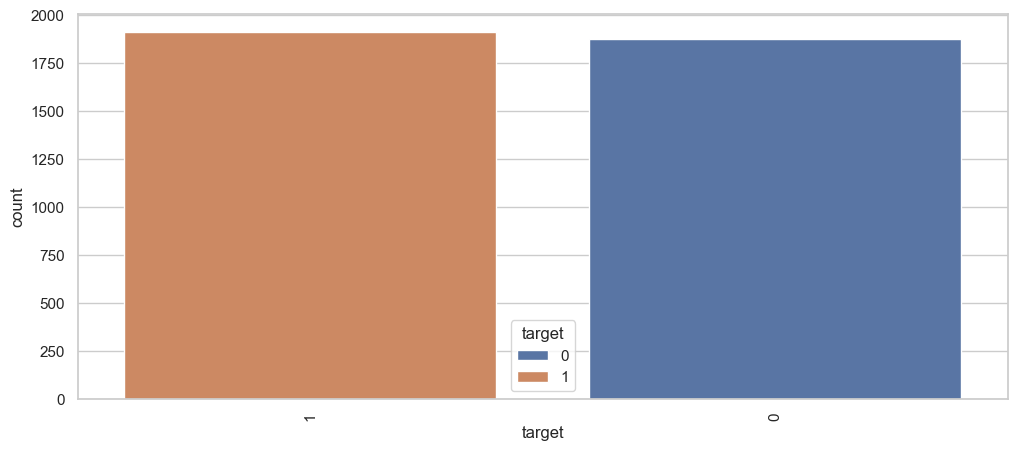

In [42]:
import seaborn as sns
sns.set_theme(style='whitegrid')


plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='target', hue='target', order=df['target'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

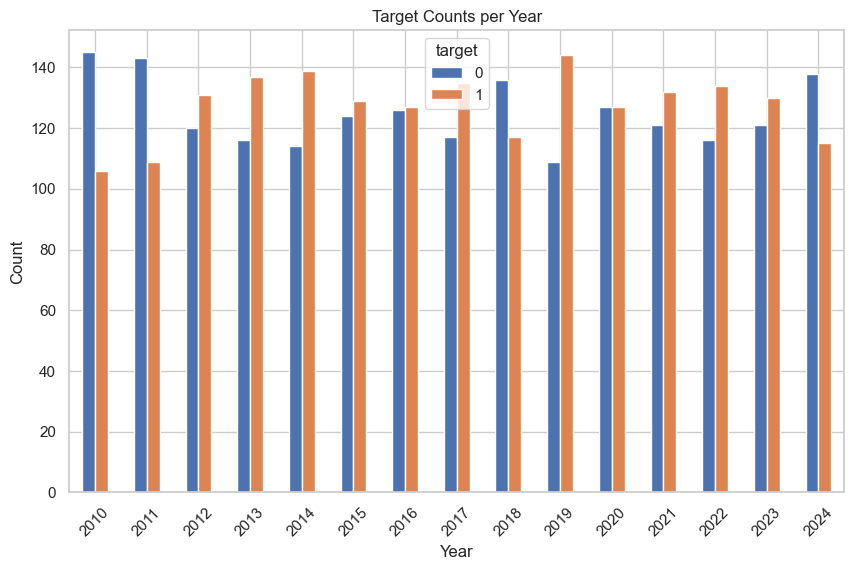

In [43]:
count = df.groupby(['year', 'target']).size().unstack(fill_value=0)
count.plot(kind='bar', figsize=(10, 6))
plt.title('Target Counts per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

* Regression

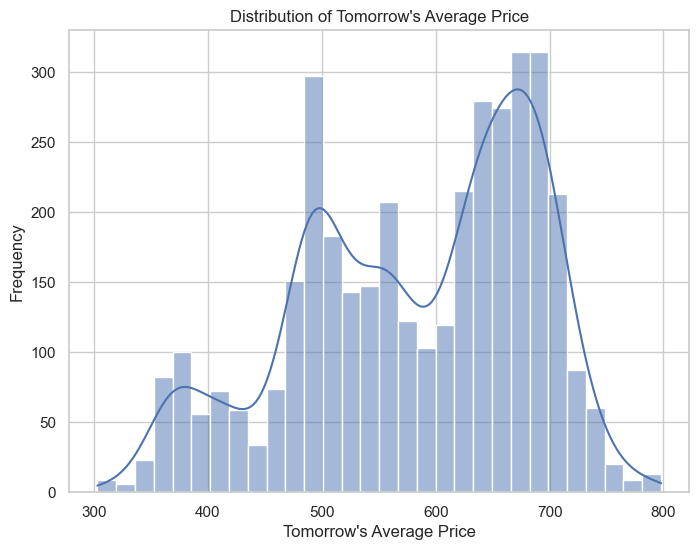

In [44]:
plt.figure(figsize=(8, 6))
sns.histplot(df['tomorrows_average'], bins=30, kde=True)
plt.title('Distribution of Tomorrow\'s Average Price')
plt.xlabel('Tomorrow\'s Average Price')
plt.ylabel('Frequency')
plt.show()

Due to the targets being relatively balanced, techniques to address class imbalance were not necessary. However, had there been an imbalance, SMOTE (Synthetic Minority Over-sampling Technique) can be used, as it is well-suited for smaller datasets

---

## Correlation and PPS Analysis

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3785 entries, 2 to 3786
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               3785 non-null   int32  
 1   open               3785 non-null   float64
 2   high               3785 non-null   float64
 3   low                3785 non-null   float64
 4   close              3785 non-null   float64
 5   volume             3785 non-null   float64
 6   weekday_monday     3785 non-null   int32  
 7   weekday_tuesday    3785 non-null   int32  
 8   weekday_wednesday  3785 non-null   int32  
 9   weekday_thursday   3785 non-null   int32  
 10  weekday_friday     3785 non-null   int32  
 11  weekday_sunday     3785 non-null   int32  
 12  pre_open           3785 non-null   float64
 13  pre_open_2         3785 non-null   float64
 14  pre_high           3785 non-null   float64
 15  pre_high_2         3785 non-null   float64
 16  pre_low            3785 non-n

In [46]:
df.head(3)

year        open        high         low       close   volume  \
2  2010  497.990021  497.990021  497.990021  497.990021  10729.0   
3  2010  507.468427  507.468427  503.543762  503.543762   6169.0   
4  2010  503.543762  503.543762  503.543762  503.543762   6169.0   

   weekday_monday  weekday_tuesday  weekday_wednesday  weekday_thursday  ...  \
2               0                0                  1                 0  ...   
3               0                0                  0                 1  ...   
4               0                0                  0                 0  ...   

    pre_low_2   pre_close  pre_close_2  pre_vol  pre_vol_2  pre_average  \
2  477.996320  497.990021   497.990021  10729.0    13401.0   502.618155   
3  507.246289  497.990021   497.990021  10729.0    10729.0   497.990021   
4  497.990021  503.543762   497.990021   6169.0    10729.0   505.506095   

   pre_average_2     average  tomorrows_average  target  
2     487.993170  497.990021         505.506095       1  
3     502.618155  505.506095         503.543762       0  
4     497.990021  503.543762         503.543762       0  

[3 rows x 27 columns]

In [47]:
import ppscore as pps


def heatmap_corr(df, threshold, figsize=(20, 12), font_annot=8):
    if len(df.columns) > 1:
        mask = np.zeros_like(df, dtype=bool)
        mask[np.triu_indices_from(mask)] = True
        mask[abs(df) < threshold] = True

        fig, axes = plt.subplots(figsize=figsize)
        sns.heatmap(df, annot=True, xticklabels=True, yticklabels=True,
                    mask=mask, cmap='viridis', annot_kws={"size": font_annot}, ax=axes,
                    linewidth=0.5, linecolor='grey')
        axes.set_yticklabels(df.columns, rotation=0)
        plt.ylim(len(df.columns), 0)
        plt.show()


def heatmap_pps(df, threshold, figsize=(20, 12), font_annot=8):
    if len(df.columns) > 1:
        mask = np.zeros_like(df, dtype=bool)
        mask[abs(df) < threshold] = True
        fig, ax = plt.subplots(figsize=figsize)
        ax = sns.heatmap(df, annot=True, xticklabels=True, yticklabels=True,
                         mask=mask, cmap='rocket_r', annot_kws={"size": font_annot},
                         linewidth=0.05, linecolor='grey')
        plt.ylim(len(df.columns), 0)
        plt.show()


def CalculateCorrAndPPS(df):
    df_corr_spearman = df.corr(method="spearman", numeric_only=True)
    df_corr_pearson = df.corr(method="pearson", numeric_only=True)

    pps_matrix_raw = pps.matrix(df)
    pps_matrix = pps_matrix_raw.filter(['x', 'y', 'ppscore']).pivot(columns='x', index='y', values='ppscore')

    pps_score_stats = pps_matrix_raw.query("ppscore < 1").filter(['ppscore']).describe().T
    print("PPS threshold - check PPS score IQR to decide threshold for heatmap \n")
    print(pps_score_stats.round(3))

    return df_corr_pearson, df_corr_spearman, pps_matrix


def DisplayCorrAndPPS(df_corr_pearson, df_corr_spearman, pps_matrix, CorrThreshold, PPS_Threshold,
                      figsize=(20, 12), font_annot=8):

    print("\n")
    print("* Analyse how the target variable for your ML models are correlated with other variables (features and target)")
    print("* Analyse multi-colinearity, that is, how the features are correlated among themselves")

    print("\n")
    print("*** Heatmap: Spearman Correlation ***")
    print("It evaluates monotonic relationship \n")
    heatmap_corr(df=df_corr_spearman, threshold=CorrThreshold, figsize=figsize, font_annot=font_annot)

    print("\n")
    print("*** Heatmap: Pearson Correlation ***")
    print("It evaluates the linear relationship between two continuous variables \n")
    heatmap_corr(df=df_corr_pearson, threshold=CorrThreshold, figsize=figsize, font_annot=font_annot)

    print("\n")
    print("*** Heatmap: Power Predictive Score (PPS) ***")
    print(f"PPS detects linear or non-linear relationships between two columns.\n"
          f"The score ranges from 0 (no predictive power) to 1 (perfect predictive power) \n")
    heatmap_pps(df=pps_matrix, threshold=PPS_Threshold, figsize=figsize, font_annot=font_annot)

The PPS threshold score indicates that over 75% of the features have a high PPS score above 0.76, demonstrating a strong correlation between those features

In [48]:
df_corr_pearson, df_corr_spearman, pps_matrix = CalculateCorrAndPPS(df)

PPS threshold - check PPS score IQR to decide threshold for heatmap 

         count   mean    std  min  25%  50%    75%    max
ppscore  702.0  0.339  0.419  0.0  0.0  0.0  0.873  0.956




* Analyse how the target variable for your ML models are correlated with other variables (features and target)
* Analyse multi-colinearity, that is, how the features are correlated among themselves


*** Heatmap: Spearman Correlation ***
It evaluates monotonic relationship 



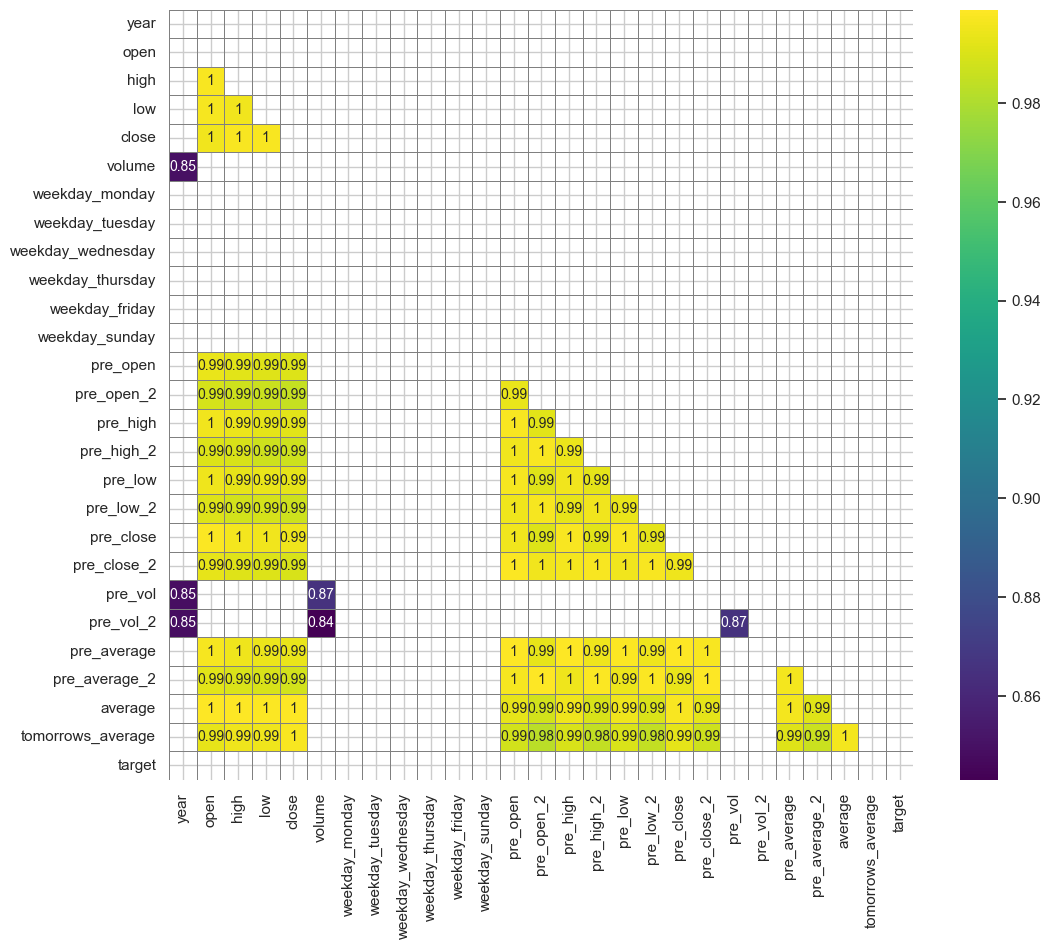



*** Heatmap: Pearson Correlation ***
It evaluates the linear relationship between two continuous variables 



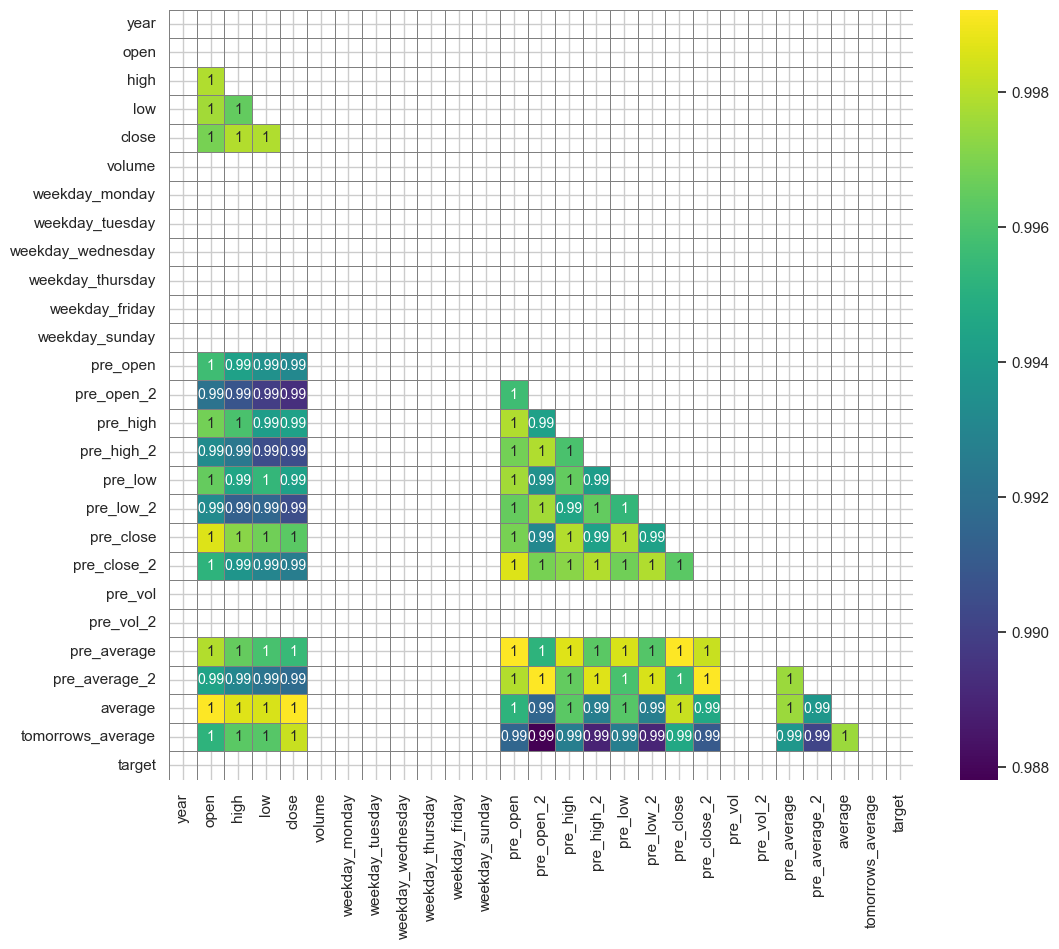



*** Heatmap: Power Predictive Score (PPS) ***
PPS detects linear or non-linear relationships between two columns.
The score ranges from 0 (no predictive power) to 1 (perfect predictive power) 



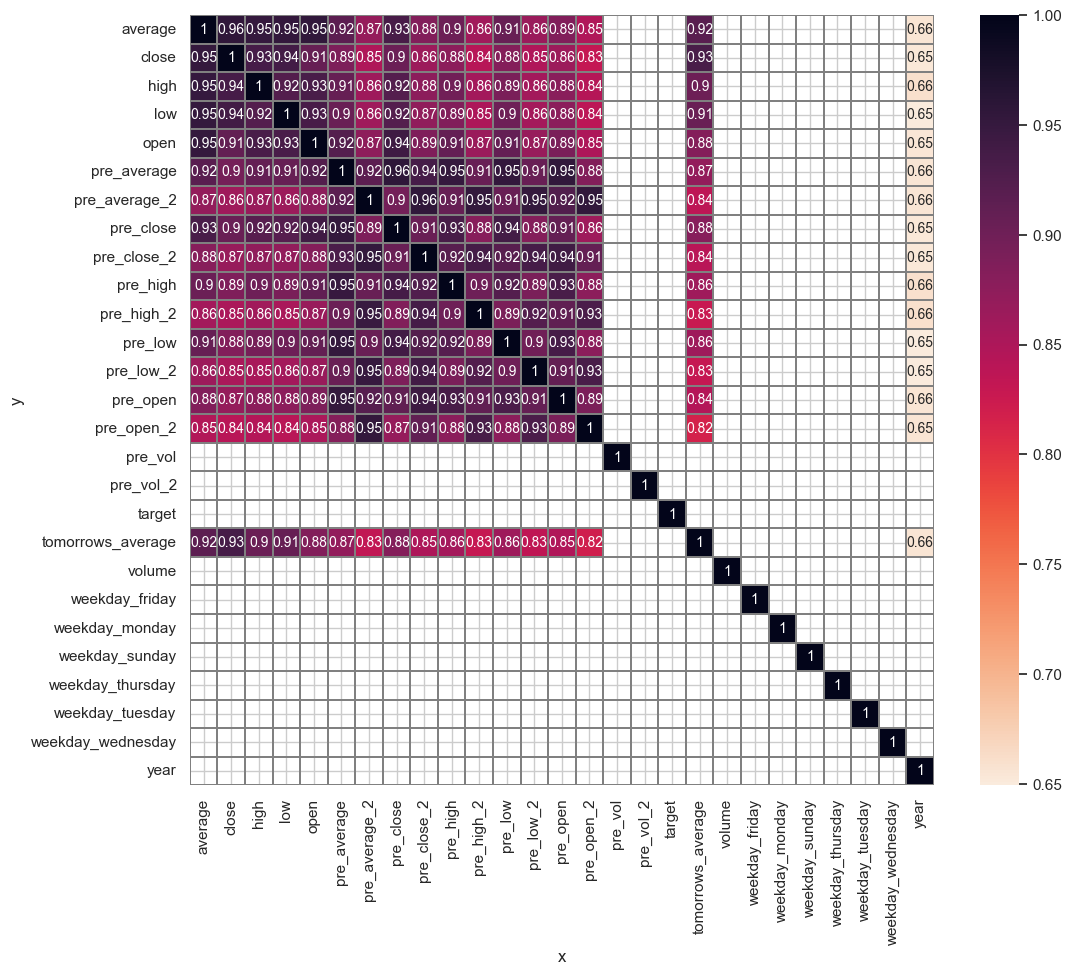

In [49]:
DisplayCorrAndPPS(df_corr_pearson = df_corr_pearson,
                  df_corr_spearman = df_corr_spearman, 
                  pps_matrix = pps_matrix,
                  CorrThreshold = 0.6, PPS_Threshold =0.6,
                  figsize=(12,10), font_annot=10)

Although we are achieving some high correlations between certain values — which is expected with stock chart data — there is no significant correlation with the target variable, date-related features, or trading volume. Additionally, the Predictive Power Score (PPS) between the year and some features shows low values, generally ranging between 0.65 and 0.66. This suggests limited predictive strength in year-based relationships for many features, indicating that time-based patterns alone may not provide strong signals across the dataset

---

## Correlation-Based Feature Importance

Next, we use both Spearman and Pearson correlation methods to assess the strength of the relationship between each feature and the target variable. By taking the absolute values of the correlations, we can identify and rank features that may be most relevant to the target, regardless of the direction of the relationship

* Spearman (monotonic)

In [50]:
target_var = 'target'

corr_spearman = df.corr(method='spearman')[target_var].sort_values(key=abs, ascending=False)[1:]
corr_spearman

weekday_monday      -0.076902
tomorrows_average    0.062494
weekday_wednesday    0.038011
close                0.025310
volume               0.025293
weekday_tuesday      0.024985
year                 0.020185
open                -0.013096
weekday_thursday     0.011287
pre_vol              0.009558
high                 0.008175
pre_high            -0.007554
pre_vol_2            0.007218
pre_high_2          -0.006995
low                  0.006957
pre_close           -0.006692
pre_close_2         -0.006364
pre_average         -0.006308
average              0.005924
pre_open            -0.005776
pre_low             -0.005693
pre_average_2       -0.005603
weekday_friday       0.005504
pre_low_2           -0.004971
pre_open_2          -0.004881
weekday_sunday      -0.001810
Name: target, dtype: float64

* Pearson (linear)

In [51]:
corr_pearson = df.corr(method='pearson')[target_var].sort_values(key=abs, ascending=False)[1:]
corr_pearson

weekday_monday      -0.076902
tomorrows_average    0.058573
weekday_wednesday    0.038011
close                0.026595
weekday_tuesday      0.024985
year                 0.020196
high                 0.011311
weekday_thursday     0.011287
low                  0.010544
average              0.009566
open                -0.007458
pre_vol              0.007211
weekday_friday       0.005504
pre_vol_2            0.003414
pre_high            -0.002754
pre_close           -0.001895
weekday_sunday      -0.001810
pre_close_2         -0.001806
pre_average         -0.001733
pre_high_2          -0.001682
pre_open            -0.001568
pre_low             -0.001432
pre_average_2       -0.000930
pre_low_2           -0.000448
volume               0.000263
pre_open_2          -0.000054
Name: target, dtype: float64

Both Spearman and Pearson correlation analyses indicate low levels of correlation between the features and the target variable

---

## EDA on Selected Variables

In [52]:
top_n = 5
top_vars  = set(corr_pearson[:top_n].index.to_list() + corr_spearman[:top_n].index.to_list())
top_vars

{'close',
 'tomorrows_average',
 'volume',
 'weekday_monday',
 'weekday_tuesday',
 'weekday_wednesday'}

In [53]:
vars_to_study = list(top_vars)
vars_to_study

['weekday_tuesday',
 'volume',
 'tomorrows_average',
 'close',
 'weekday_monday',
 'weekday_wednesday']

In [54]:
df_eda = df.filter(vars_to_study + [target_var])
df_eda.head(3)

weekday_tuesday   volume  tomorrows_average       close  weekday_monday  \
2                0  10729.0         505.506095  497.990021               0   
3                0   6169.0         503.543762  503.543762               0   
4                0   6169.0         503.543762  503.543762               0   

   weekday_wednesday  target  
2                  1       1  
3                  0       0  
4                  0       0

---

## Variables Distribution by Target

We plot the distribution (numerical and categorical) coloured by Traget

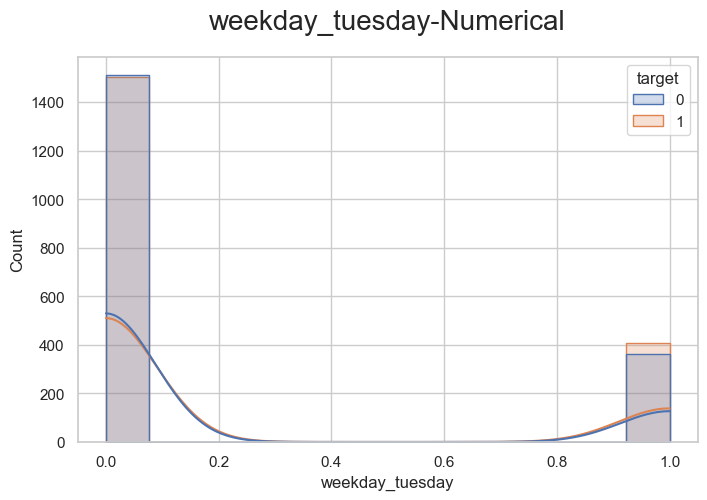

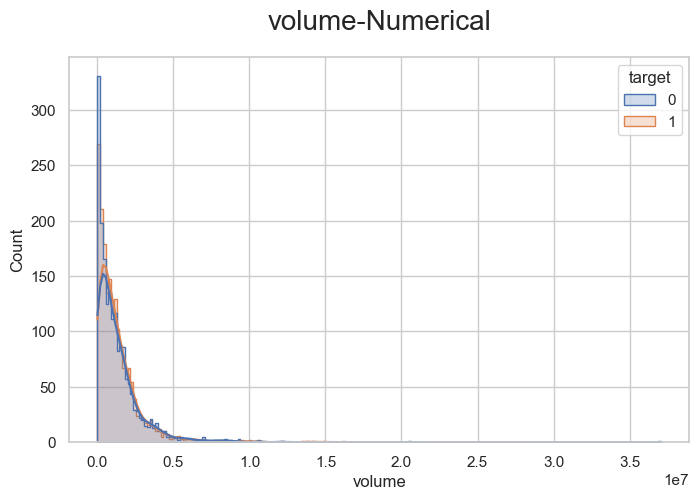

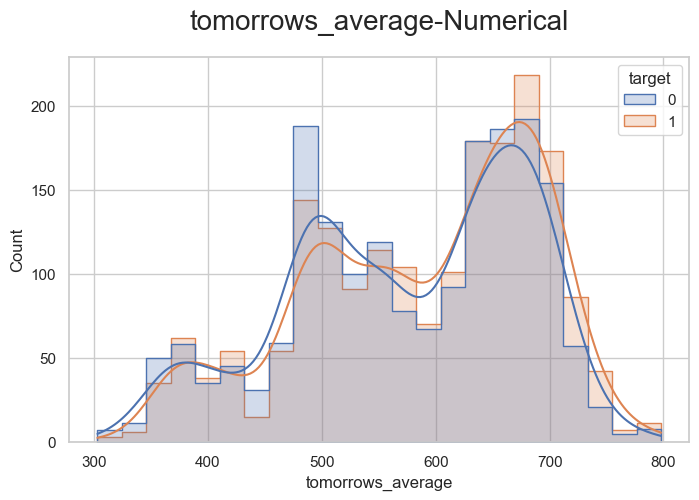

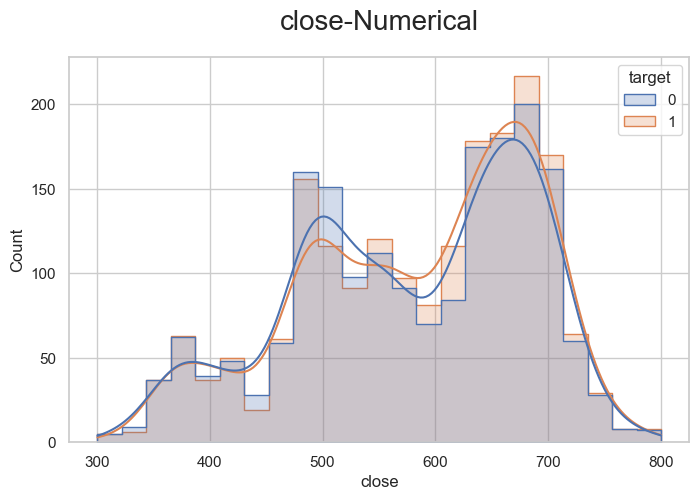

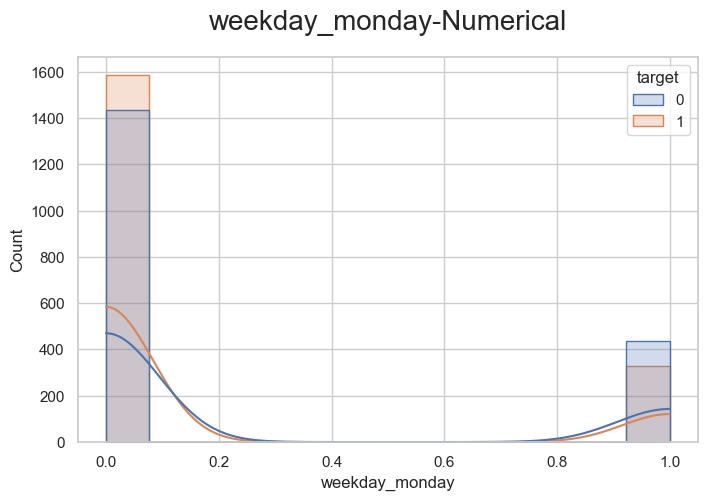

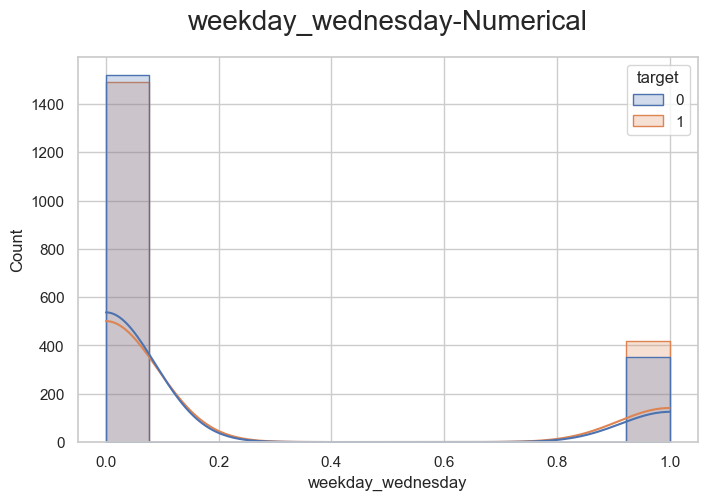

In [55]:
sns.set_style('whitegrid')


def plot_categorical(df, col, target_var):

    plt.figure(figsize=(12, 5))
    sns.countplot(data=df, x=col, hue=target_var, order=df[col].value_counts().index)
    plt.xticks(rotation=90)
    plt.title(f"{col}-Categorical", fontsize=20, y=1.05)
    plt.show()


def plot_numerical(df, col, target_var):
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=col, hue=target_var, kde=True, element="step")
    plt.title(f"{col}-Numerical", fontsize=20, y=1.05)
    plt.show()


for col in vars_to_study:
    if df_eda[col].dtype == 'object':
        plot_categorical(df_eda, col, target_var)
        print("\n\n")
    else:
        plot_numerical(df_eda, col, target_var)
        print("\n\n")

We have observed that, among the selected variables, both the days and the target variable are very well balanced. Additionally, features such as open and close prices also show a strong balance, indicating a consistent distribution across the dataset

---

## Parallel Plot

Create a separate DataFrame and transform tomorrowa average (numerical) into bins (categorical) for visualising at parallel_categories() plot

In [56]:
median = df['tomorrows_average'].median()
print(median)

603.2990704303752


In [57]:
from feature_engine.discretisation import ArbitraryDiscretiser
import numpy as np
bin_map = [-np.inf, 600, 650, 700, np.inf]
disc = ArbitraryDiscretiser(binning_dict={'tomorrows_average': bin_map})
df_parallel = disc.fit_transform(df_eda)
df_parallel.head()

weekday_tuesday   volume  tomorrows_average       close  weekday_monday  \
2                0  10729.0                  0  497.990021               0   
3                0   6169.0                  0  503.543762               0   
4                0   6169.0                  0  503.543762               0   
5                0   6169.0                  0  503.543762               1   
6                1   6169.0                  0  499.841217               0   

   weekday_wednesday  target  
2                  1       1  
3                  0       0  
4                  0       0  
5                  0       0  
6                  0       1

In [58]:
disc.binner_dict_['tomorrows_average']

[-inf, 600, 650, 700, inf]

In [59]:
n_classes = len(bin_map) - 1
classes_ranges = disc.binner_dict_['tomorrows_average'][1:-1]

labels_map = {}
for n in range(0, n_classes):
    if n == 0:
        labels_map[n] = f"<{classes_ranges[0]}"  
    elif n == n_classes - 1:
        labels_map[n] = f"+{classes_ranges[-1]}" 
    else:
        labels_map[n] = f"{classes_ranges[n-1]} to {classes_ranges[n]}" 

labels_map

{0: '<600', 1: '600 to 650', 2: '650 to 700', 3: '+700'}

In [60]:
df_parallel['tomorrows_average'] = df_parallel['tomorrows_average'].replace(labels_map)
df_parallel

weekday_tuesday     volume tomorrows_average       close  \
2                   0    10729.0              <600  497.990021   
3                   0     6169.0              <600  503.543762   
4                   0     6169.0              <600  503.543762   
5                   0     6169.0              <600  503.543762   
6                   1     6169.0              <600  499.841217   
...               ...        ...               ...         ...   
3782                0  3415182.0              <600  500.261322   
3783                0  1071229.0              <600  501.260834   
3784                1   436491.0              <600  501.760590   
3785                0   881757.0              <600  502.760132   
3786                0   608408.0              <600  500.761078   

      weekday_monday  weekday_wednesday  target  
2                  0                  1       1  
3                  0                  0       0  
4                  0                  0       0  
5                  1                  0       0  
6                  0                  0       1  
...              ...                ...     ...  
3782               0                  0       0  
3783               1                  0       1  
3784               0                  0       0  
3785               0                  0       0  
3786               1                  0       1  

[3785 rows x 7 columns]

In [61]:
import plotly.express as px
fig = px.parallel_categories(df_parallel, color='target')
fig.show(renderer='jupyterlab')

---

## Reviewing Outliners

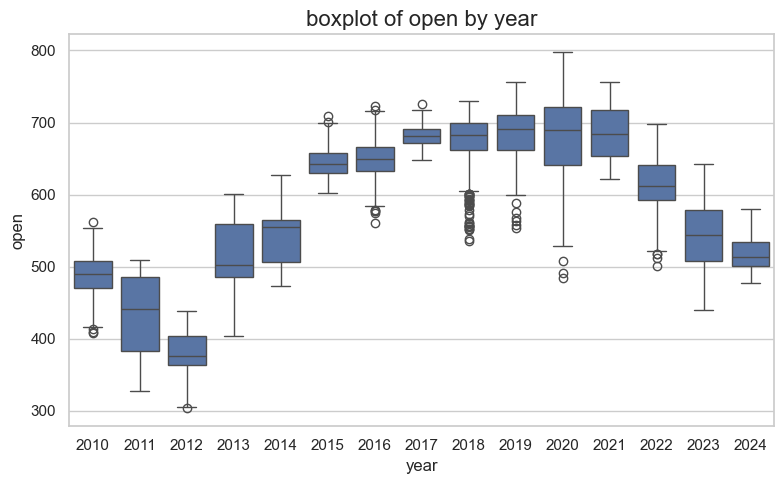

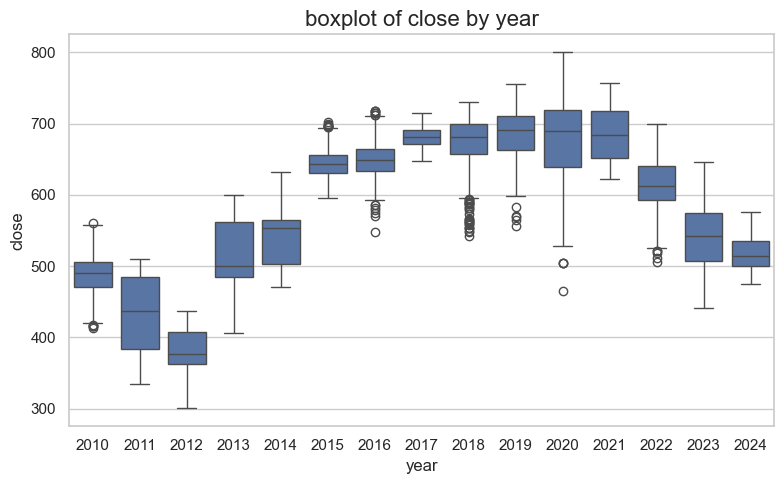

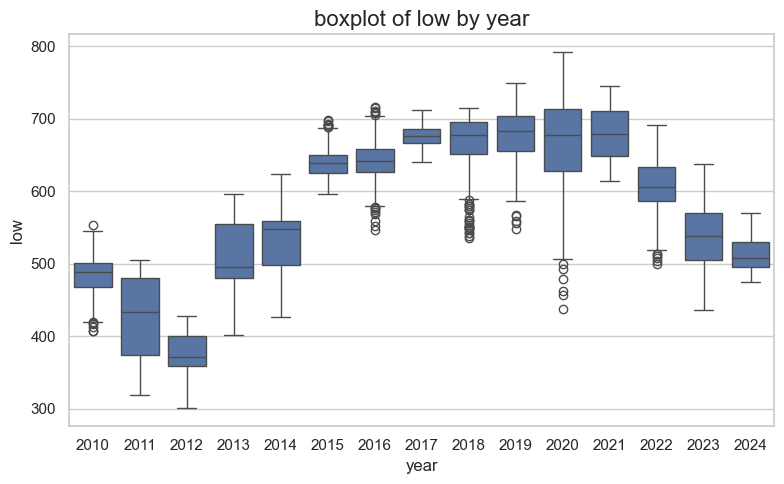

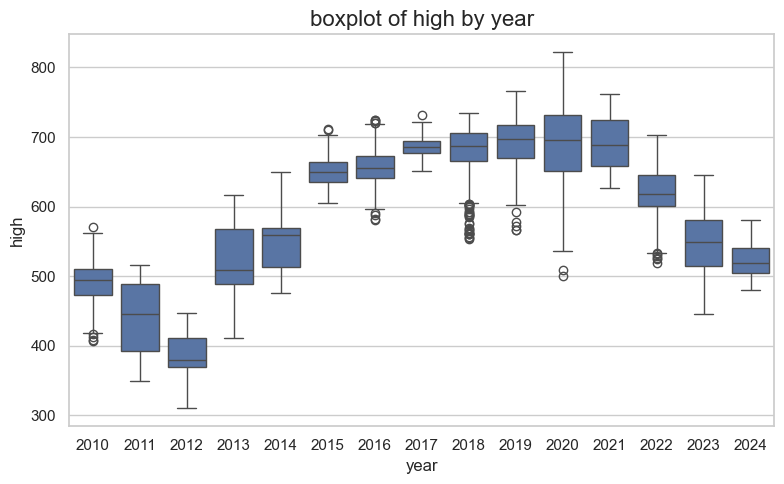

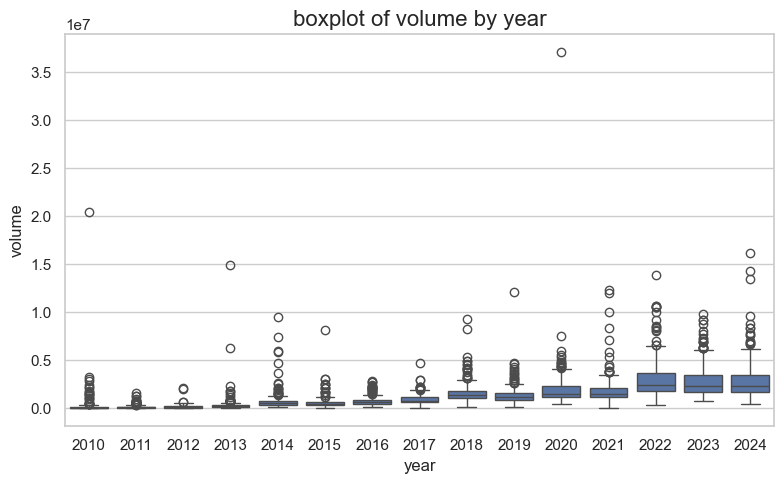

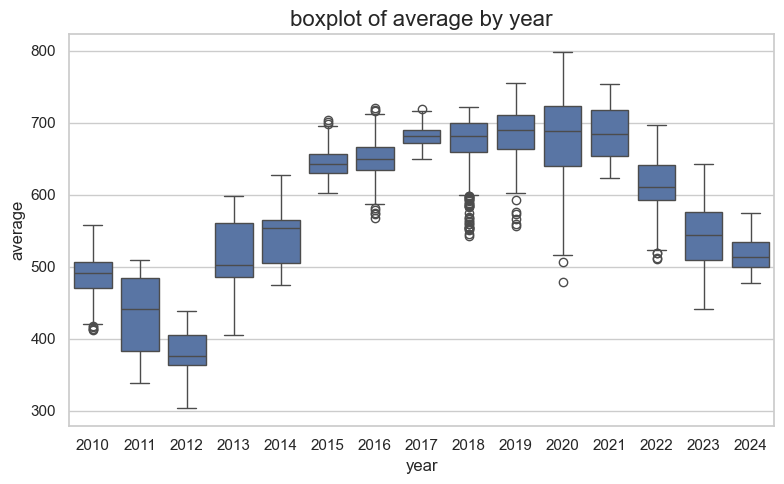

In [62]:
columns = ['open', 'close', 'low', 'high', 'volume', 'average']

for col in columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x='year', y=col) 
    plt.title(f"boxplot of {col} by year", fontsize=16)
    plt.tight_layout()
    plt.show()

In analyzing the stock data, several outliers were observed across the different features. However, these outliers are not spread widely and tend to be closely clustered together. This indicates that while there are extreme values, they do not diverge significantly from the overall trend, suggesting that they might represent specific periods of unusual but not entirely anomalous market behavior. The closeness of these outliers may imply that they are part of short-term fluctuations within the stock's price movement, rather than true anomalies. This characteristic could be important for further analysis as it might help distinguish between regular market volatility and rare, exceptional events

---

## Stock Risk Assessment: Analyzing Highs, Lows, and Volume Trends

In [63]:
yearly_stats = df.groupby('year').agg({
    'high': 'max',
    'low': 'min',
    'volume': 'sum',
})

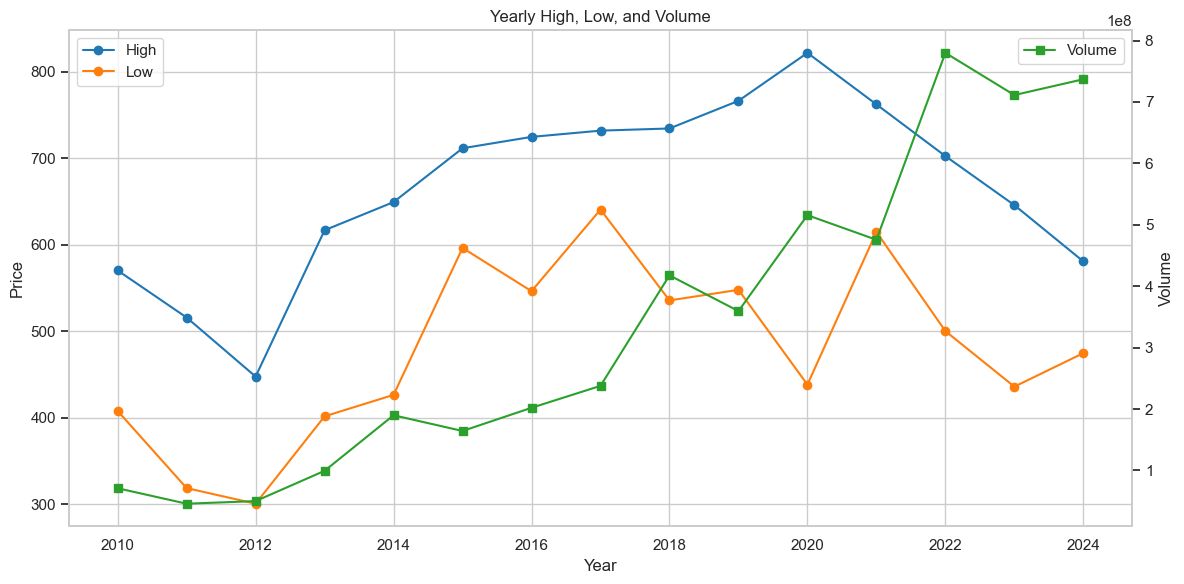

In [64]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(yearly_stats.index, yearly_stats['high'], marker='o', label='High', color='tab:blue')
ax1.plot(yearly_stats.index, yearly_stats['low'], marker='o', label='Low', color='tab:orange')
ax1.set_xlabel('Year')
ax1.set_ylabel('Price')
ax1.legend(loc='upper left')
ax1.grid(True)

ax2 = ax1.twinx()
ax2.plot(yearly_stats.index, yearly_stats['volume'], marker='s', label='Volume', color='tab:green')
ax2.set_ylabel('Volume')
ax2.legend(loc='upper right')

plt.title("Yearly High, Low, and Volume")
plt.tight_layout()
plt.grid(axis='y')
plt.show()

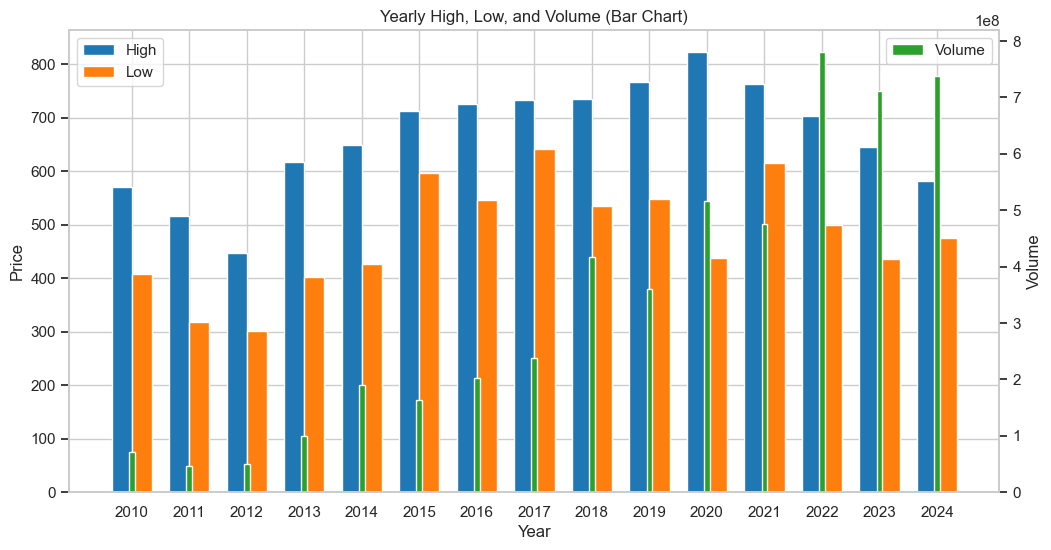

In [65]:
years = yearly_stats.index
bar_width = 0.35
x = range(len(years))

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.bar([p - bar_width/2 for p in x], yearly_stats['high'], bar_width, label='High', color='tab:blue')
ax1.bar([p + bar_width/2 for p in x], yearly_stats['low'], bar_width, label='Low', color='tab:orange')
ax1.set_ylabel('Price')
ax1.set_xlabel('Year')
ax1.set_xticks(x)
ax1.set_xticklabels(years)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.bar(x, yearly_stats['volume'], width=0.1, label='Volume', color='tab:green')
ax2.set_ylabel('Volume')
ax2.legend(loc='upper right')

plt.title('Yearly High, Low, and Volume (Bar Chart)')
plt.grid(axis='y')
plt.show()

These charts compare yearly high and low stock prices with total trading volume. Over the past 15 years, stock prices have remained within a relatively close range, while trading volume has experienced a strong upward trend. Notably, between 2015 and 2020, there was an upward movement in stock prices, indicating a possible bullish trend during that period. However, following this upward movement, prices declined, returning close to their 2010 levels. This suggests that the stock may not have offered significant long-term gains for holders who did not sell during the bullish phase. Nonetheless, the current lower price levels could represent a potential entry point for new investors, especially if underlying fundamentals remain strong

---

## Summary

* Exploratory Data Analysis (EDA): We performed an exploratory analysis, adding relevant features and targets for both regression and classification tasks in supervised learning

* Data Quality: The dataset was clean with no missing values. A small amount of missing data was introduced when shifting columns to create new features, but the volume was minimal and dropping them did not affect the analysis

* Feature Correlation: There is a high correlation between stock-related numerical features (open, close, low, high), which is typical for stock data. However, there is very little correlation between the targets, time/date features, and volume, indicating potential unpredictability in the stock trends

### Conclusion & Next Steps:

* Observed Trend: A relatively stable trend was observed in high and low values over the years, while trading volume demonstrated a noticeable increase

* Next Steps: The next step will be to re-add the features, clean the data further, and then split it into training and testing sets. This will prepare the data for the feature engineering stage